In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind 

df = pd.read_excel("data5.xlsx", sheet_name=1, index_col='state_name', na_values='..')

# оставляем страны, по которым есть полные данные с 2003 по 2022
df = df.groupby('state_name').filter(lambda x: x['year'].min() == 2002 and x['year'].max() == 2022)

# удаляем чрезмерно экономически развитые страны (выбросы)
df = df.drop(['Bahrain', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'Trinidad and Tobago', 
              'United Arab Emirates', 'Chile', 'Croatia', 'Hungary', 'Poland', 'Uruguay', 'Equatorial Guinea'])

# удаляем Океанию
df = df[df['region'] != 7]

# выносим названия некоторых колонок в отдельный список для последующих манипуляций
cols = ['libdem_norm_diff', 'property_rights_diff', 'tax_burden_diff', 'government_spending_diff', 
        'business_freedom_diff', 'monetary_freedom_diff', 'trade_freedom_diff', 'investment_freedom_diff', 
        'financial_freedom_diff', 'gov_effectiveness_diff', 'corruption_diff', 'pstab_diff']

cols_1 = ['libdem_norm', 'property_rights', 'tax_burden', 'government_spending', 
        'business_freedom', 'monetary_freedom', 'trade_freedom', 'investment_freedom', 
        'financial_freedom', 'gov_effectiveness', 'corruption', 'pstab']

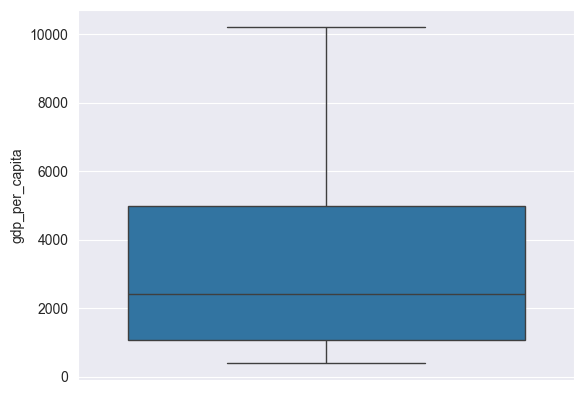

In [23]:
# добавляем столбец 'gdp_per_capita' и оцениваем количество выбросов
df['gdp_per_capita'] = df['gdp'] * 1000000 / df['population']

countries_gdp_per_capita = df.groupby('state_name')['gdp_per_capita'].agg('mean')

sns.boxplot(countries_gdp_per_capita)
plt.show()

In [24]:
# сделаем отдельные датасеты под каждый из периодов для дальнейших расчётов
df_11_and_more_years_imf_supp = df[df.groupby('state_name')['imf_pr'].transform('sum') >= 11]
df_5_to_10_years_imf_supp = df[(df.groupby('state_name')['imf_pr'].transform('sum') >= 5) & (df.groupby('state_name')['imf_pr'].transform('sum') <= 10)]
df_4_and_less_years_imf_supp = df[df.groupby('state_name')['imf_pr'].transform('sum') <= 4]

In [25]:
print(len(df_4_and_less_years_imf_supp.index.tolist()))
print(len(df_5_to_10_years_imf_supp.index.tolist()))
print(len(df_11_and_more_years_imf_supp.index.tolist()))

567
630
630


In [26]:
# делим датасет для стран 10+ лет в программах МВФ на два периода - один с 2003 по 2012, второй с 2013 по 2022
df_11_and_more_years_imf_supp_2003_2012 = df_11_and_more_years_imf_supp.query('2003 <= year <= 2012')
df_11_and_more_years_imf_supp_2013_2022 = df_11_and_more_years_imf_supp.query('2013 <= year <= 2022')

# делаем тест Манна-Уитни и T-тест для каждой из колонок, выводим результат
for col in cols:
    u_stat, p_value = mannwhitneyu(df_11_and_more_years_imf_supp_2003_2012[col], df_11_and_more_years_imf_supp_2013_2022[col], alternative='greater')
    print(col)
    print(f"U-statistic: {u_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    t_stat, p_value = ttest_ind(df_11_and_more_years_imf_supp_2003_2012[col], df_11_and_more_years_imf_supp_2013_2022[col], alternative='greater')
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}\n")

libdem_norm_diff
U-statistic: 50091.0000
P-value: 0.0082
T-statistic: 0.4626
P-value: 0.3219

property_rights_diff
U-statistic: 37781.5000
P-value: 0.9999
T-statistic: -4.0066
P-value: 1.0000

tax_burden_diff
U-statistic: 48921.5000
P-value: 0.0323
T-statistic: 2.6241
P-value: 0.0045

government_spending_diff
U-statistic: 38080.5000
P-value: 0.9994
T-statistic: -2.7769
P-value: 0.9972

business_freedom_diff
U-statistic: 51652.0000
P-value: 0.0008
T-statistic: 1.5564
P-value: 0.0601

monetary_freedom_diff
U-statistic: 45063.5000
P-value: 0.4882
T-statistic: -0.0425
P-value: 0.5169

trade_freedom_diff
U-statistic: 53866.0000
P-value: 0.0000
T-statistic: 4.1382
P-value: 0.0000

investment_freedom_diff
U-statistic: 42772.0000
P-value: 0.9034
T-statistic: -1.2971
P-value: 0.9024

financial_freedom_diff
U-statistic: 44256.0000
P-value: 0.7451
T-statistic: 0.1630
P-value: 0.4353

gov_effectiveness_diff
U-statistic: 45965.5000
P-value: 0.3247
T-statistic: 0.6214
P-value: 0.2673

corruption_dif

In [27]:
for col in cols:
    print(col)
    print(f'Среднее за период 03-12 равно: {df_11_and_more_years_imf_supp_2003_2012[col].mean():.4f}')
    print(f'Среднее за период 13-22 равно: {df_11_and_more_years_imf_supp_2013_2022[col].mean():.4f}')
    print(f'Дельта равна: {df_11_and_more_years_imf_supp_2003_2012[col].mean() - df_11_and_more_years_imf_supp_2013_2022[col].mean():.4f}')
    print()

libdem_norm_diff
Среднее за период 03-12 равно: 0.2857
Среднее за период 13-22 равно: 0.1093
Дельта равна: 0.1764

property_rights_diff
Среднее за период 03-12 равно: -0.6910
Среднее за период 13-22 равно: 1.0917
Дельта равна: -1.7827

tax_burden_diff
Среднее за период 03-12 равно: 0.8980
Среднее за период 13-22 равно: 0.2177
Дельта равна: 0.6803

government_spending_diff
Среднее за период 03-12 равно: -0.4783
Среднее за период 13-22 равно: 0.7943
Дельта равна: -1.2727

business_freedom_diff
Среднее за период 03-12 равно: 0.1010
Среднее за период 13-22 равно: -0.6153
Дельта равна: 0.7163

monetary_freedom_diff
Среднее за период 03-12 равно: -0.0107
Среднее за период 13-22 равно: 0.0030
Дельта равна: -0.0137

trade_freedom_diff
Среднее за период 03-12 равно: 1.1583
Среднее за период 13-22 равно: -0.5803
Дельта равна: 1.7387

investment_freedom_diff
Среднее за период 03-12 равно: -0.0833
Среднее за период 13-22 равно: 0.5667
Дельта равна: -0.6500

financial_freedom_diff
Среднее за период

In [28]:
# делим датасет для стран от 4 до 9 лет в программах МВФ на два периода - один с 2003 по 2012, второй с 2013 по 2022
df_5_to_10_years_imf_supp_2003_2012 = df_5_to_10_years_imf_supp.query('2003 <= year <= 2012')
df_5_to_10_years_imf_supp_2013_2022 = df_5_to_10_years_imf_supp.query('2013 <= year <= 2022')

# делаем тест Манна-Уитни и T-тест для каждой из колонок, выводим результат
for col in cols:
    u_stat, p_value = mannwhitneyu(df_5_to_10_years_imf_supp_2003_2012[col], df_5_to_10_years_imf_supp_2013_2022[col], alternative='less')
    print(col)
    print(f"U-statistic: {u_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    t_stat, p_value = ttest_ind(df_5_to_10_years_imf_supp_2003_2012[col], df_5_to_10_years_imf_supp_2013_2022[col], alternative='less')
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}\n")

libdem_norm_diff
U-statistic: 52057.5000
P-value: 0.9996
T-statistic: 1.8448
P-value: 0.9672

property_rights_diff
U-statistic: 40370.5000
P-value: 0.0069
T-statistic: -4.0526
P-value: 0.0000

tax_burden_diff
U-statistic: 47399.5000
P-value: 0.8711
T-statistic: 1.2913
P-value: 0.9015

government_spending_diff
U-statistic: 43112.0000
P-value: 0.1870
T-statistic: -0.7171
P-value: 0.2368

business_freedom_diff
U-statistic: 52757.5000
P-value: 0.9999
T-statistic: 2.8300
P-value: 0.9976

monetary_freedom_diff
U-statistic: 45375.0000
P-value: 0.5702
T-statistic: 0.3010
P-value: 0.6183

trade_freedom_diff
U-statistic: 56165.0000
P-value: 1.0000
T-statistic: 4.0814
P-value: 1.0000

investment_freedom_diff
U-statistic: 40486.0000
P-value: 0.0044
T-statistic: -2.9911
P-value: 0.0014

financial_freedom_diff
U-statistic: 43662.5000
P-value: 0.1392
T-statistic: -0.3613
P-value: 0.3590

gov_effectiveness_diff
U-statistic: 46539.5000
P-value: 0.7659
T-statistic: 0.8476
P-value: 0.8015

corruption_dif

In [29]:
for col in cols:
    print(col)
    print(f'Среднее за период 03-12 равно: {df_5_to_10_years_imf_supp_2003_2012[col].mean():.4f}')
    print(f'Среднее за период 13-22 равно: {df_5_to_10_years_imf_supp_2013_2022[col].mean():.4f}')
    print(f'Дельта равна: {df_5_to_10_years_imf_supp_2003_2012[col].mean() - df_5_to_10_years_imf_supp_2013_2022[col].mean():.4f}')
    print()

libdem_norm_diff
Среднее за период 03-12 равно: 0.1667
Среднее за период 13-22 равно: -0.4558
Дельта равна: 0.6225

property_rights_diff
Среднее за период 03-12 равно: -0.6167
Среднее за период 13-22 равно: 1.2717
Дельта равна: -1.8883

tax_burden_diff
Среднее за период 03-12 равно: 0.4840
Среднее за период 13-22 равно: 0.1613
Дельта равна: 0.3227

government_spending_diff
Среднее за период 03-12 равно: -0.3020
Среднее за период 13-22 равно: 0.0703
Дельта равна: -0.3723

business_freedom_diff
Среднее за период 03-12 равно: 0.5467
Среднее за период 13-22 равно: -0.5120
Дельта равна: 1.0587

monetary_freedom_diff
Среднее за период 03-12 равно: 0.0160
Среднее за период 13-22 равно: -0.0787
Дельта равна: 0.0947

trade_freedom_diff
Среднее за период 03-12 равно: 1.2960
Среднее за период 13-22 равно: -0.6700
Дельта равна: 1.9660

investment_freedom_diff
Среднее за период 03-12 равно: -0.8667
Среднее за период 13-22 равно: 0.6000
Дельта равна: -1.4667

financial_freedom_diff
Среднее за период

In [30]:
# делим датасет для стран 3- лет в программах МВФ на два периода - один с 2003 по 2012, второй с 2013 по 2022
df_4_and_less_years_imf_supp_2003_2012 = df_4_and_less_years_imf_supp.query('2003 <= year <= 2012')
df_4_and_less_years_imf_supp_2013_2022 = df_4_and_less_years_imf_supp.query('2013 <= year <= 2022')

# делаем тест Манна-Уитни и T-тест для каждой из колонок, выводим результат
for col in cols:
    u_stat, p_value = mannwhitneyu(df_4_and_less_years_imf_supp_2003_2012[col], df_4_and_less_years_imf_supp_2013_2022[col], alternative='less')
    print(col)
    print(f"U-statistic: {u_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    t_stat, p_value = ttest_ind(df_4_and_less_years_imf_supp_2003_2012[col], df_4_and_less_years_imf_supp_2013_2022[col], alternative='less')
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}\n")

libdem_norm_diff
U-statistic: 44065.5000
P-value: 1.0000
T-statistic: 3.5071
P-value: 0.9998

property_rights_diff
U-statistic: 31917.5000
P-value: 0.0023
T-statistic: -3.0266
P-value: 0.0013

tax_burden_diff
U-statistic: 39421.0000
P-value: 0.9497
T-statistic: 2.7282
P-value: 0.9967

government_spending_diff
U-statistic: 33745.5000
P-value: 0.0679
T-statistic: -1.8611
P-value: 0.0316

business_freedom_diff
U-statistic: 38363.5000
P-value: 0.8551
T-statistic: 1.6795
P-value: 0.9532

monetary_freedom_diff
U-statistic: 35582.0000
P-value: 0.3161
T-statistic: 0.4497
P-value: 0.6734

trade_freedom_diff
U-statistic: 42555.5000
P-value: 0.9996
T-statistic: 2.4982
P-value: 0.9936

investment_freedom_diff
U-statistic: 30742.0000
P-value: 0.0000
T-statistic: -3.9766
P-value: 0.0000

financial_freedom_diff
U-statistic: 36112.5000
P-value: 0.3772
T-statistic: -0.5931
P-value: 0.2767

gov_effectiveness_diff
U-statistic: 37684.5000
P-value: 0.7521
T-statistic: 0.5552
P-value: 0.7105

corruption_dif

In [31]:
for col in cols:
    print(col)
    print(f'Среднее за период 03-12 равно: {df_4_and_less_years_imf_supp_2003_2012[col].mean():.4f}')
    print(f'Среднее за период 13-22 равно: {df_4_and_less_years_imf_supp_2013_2022[col].mean():.4f}')
    print(f'Дельта равна: {df_4_and_less_years_imf_supp_2003_2012[col].mean() - df_4_and_less_years_imf_supp_2013_2022[col].mean():.4f}')
    print()

libdem_norm_diff
Среднее за период 03-12 равно: 0.0504
Среднее за период 13-22 равно: -0.8092
Дельта равна: 0.8596

property_rights_diff
Среднее за период 03-12 равно: -0.4074
Среднее за период 13-22 равно: 1.2396
Дельта равна: -1.6470

tax_burden_diff
Среднее за период 03-12 равно: 0.7756
Среднее за период 13-22 равно: 0.0970
Дельта равна: 0.6785

government_spending_diff
Среднее за период 03-12 равно: -0.5185
Среднее за период 13-22 равно: 0.3726
Дельта равна: -0.8911

business_freedom_diff
Среднее за период 03-12 равно: 0.4315
Среднее за период 13-22 равно: -0.2996
Дельта равна: 0.7311

monetary_freedom_diff
Среднее за период 03-12 равно: 0.1044
Среднее за период 13-22 равно: -0.1285
Дельта равна: 0.2330

trade_freedom_diff
Среднее за период 03-12 равно: 1.0681
Среднее за период 13-22 равно: -0.3581
Дельта равна: 1.4263

investment_freedom_diff
Среднее за период 03-12 равно: -0.8519
Среднее за период 13-22 равно: 1.0744
Дельта равна: -1.9263

financial_freedom_diff
Среднее за период